In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df=pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X,y=df.iloc[:,0:-1],df.iloc[:,-1]

In [7]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [8]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [11]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_predict=lr.predict(X_test)
r2_score(y_test,y_predict)

0.6275531792314848

In [13]:
lr=LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628683)

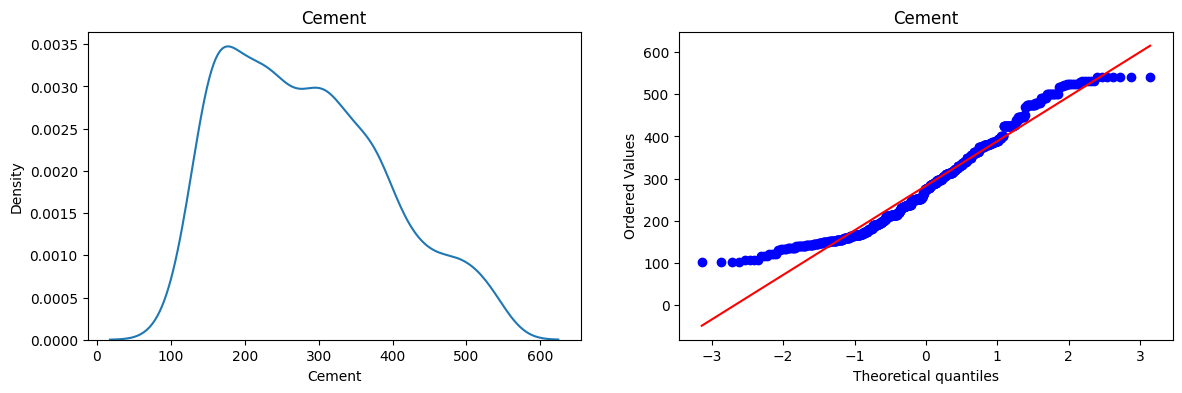

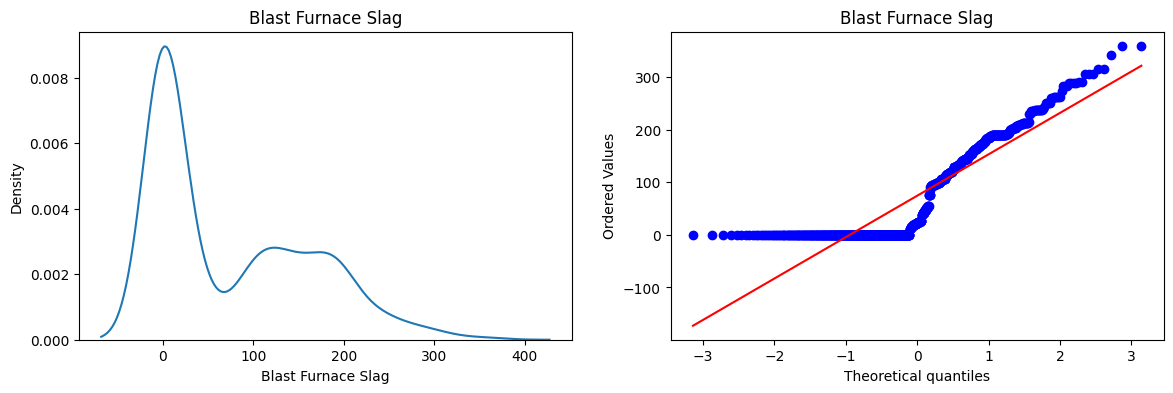

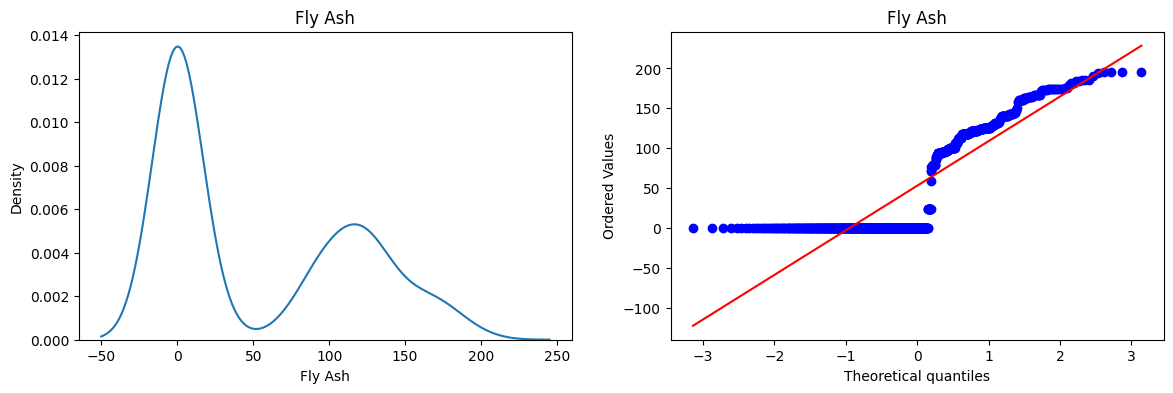

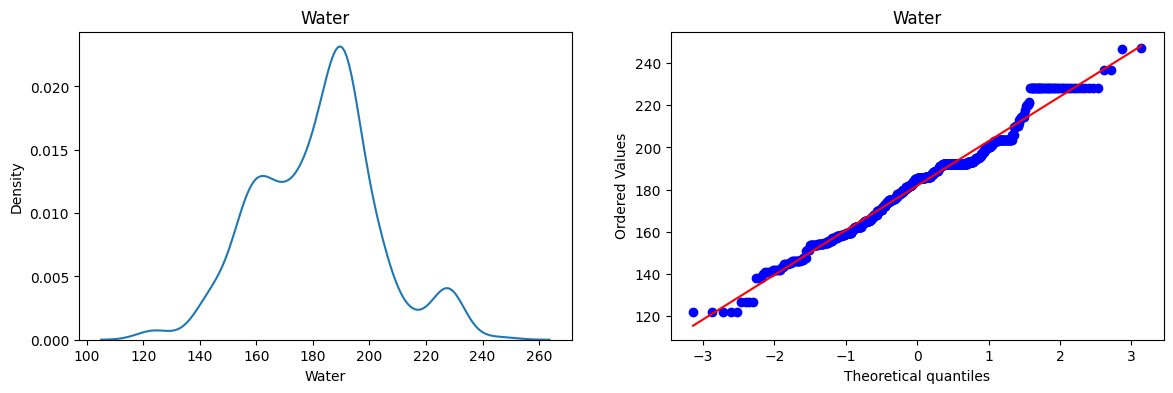

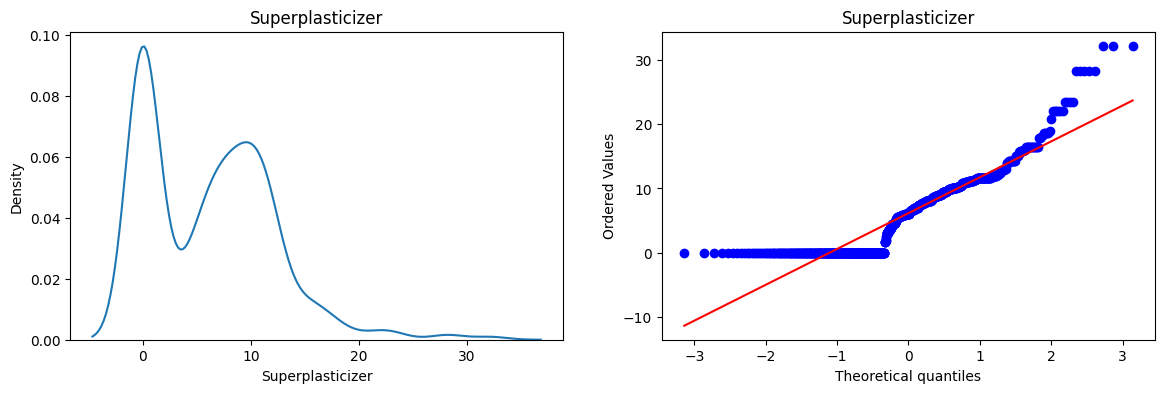

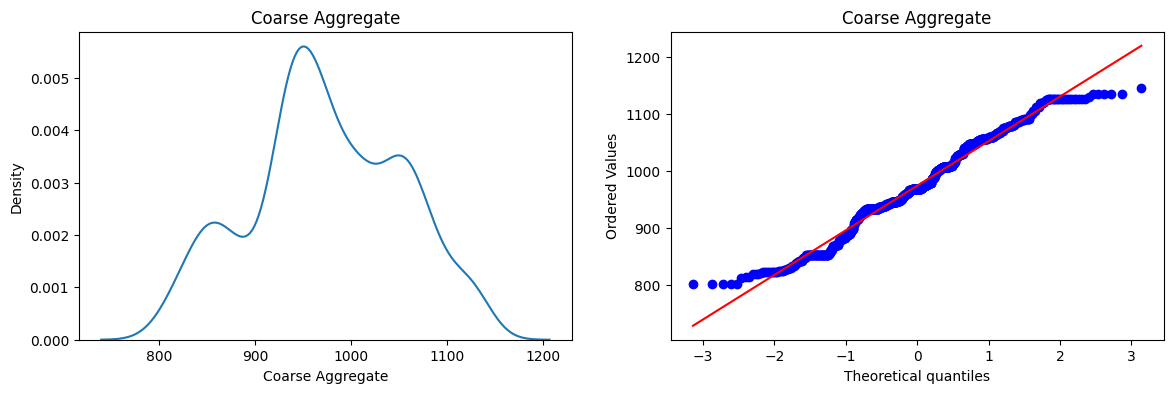

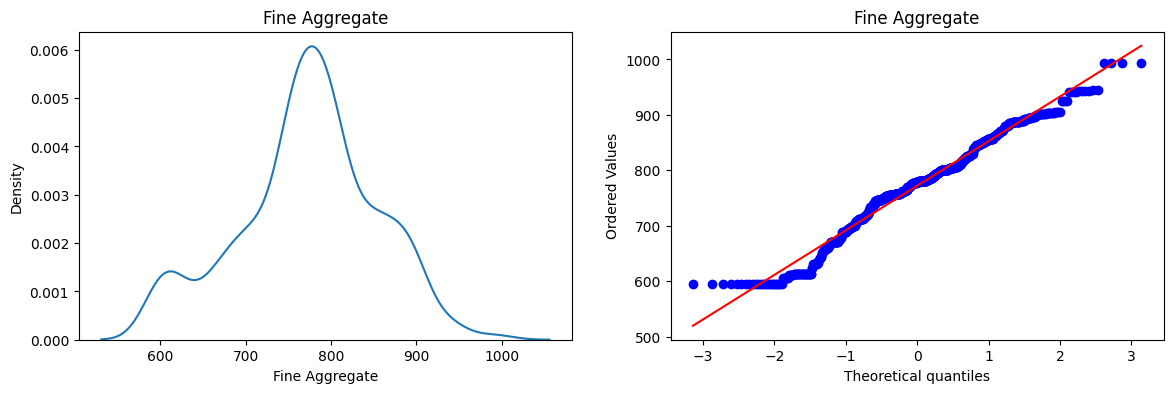

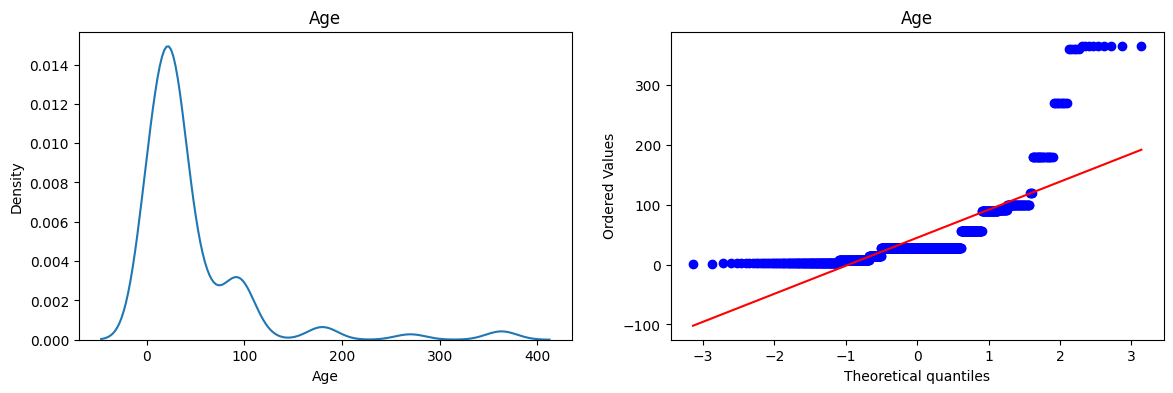

In [19]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

# Applying Box-Cox Transform

In [22]:
pt1=PowerTransformer(method='box-cox')
X_train_transformed = pt1.fit_transform(X_train+0.000001)
X_test_transformed = pt1.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [23]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825005397711

In [24]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.665853794702427)

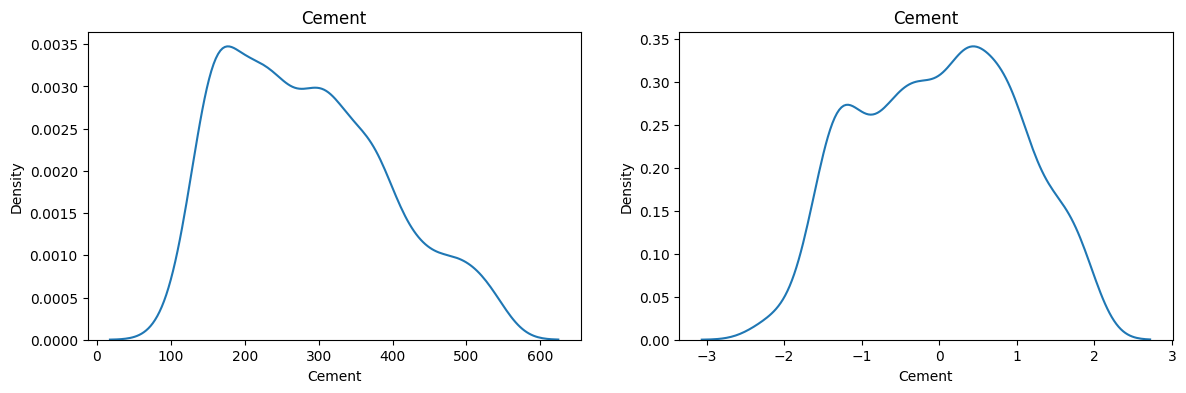

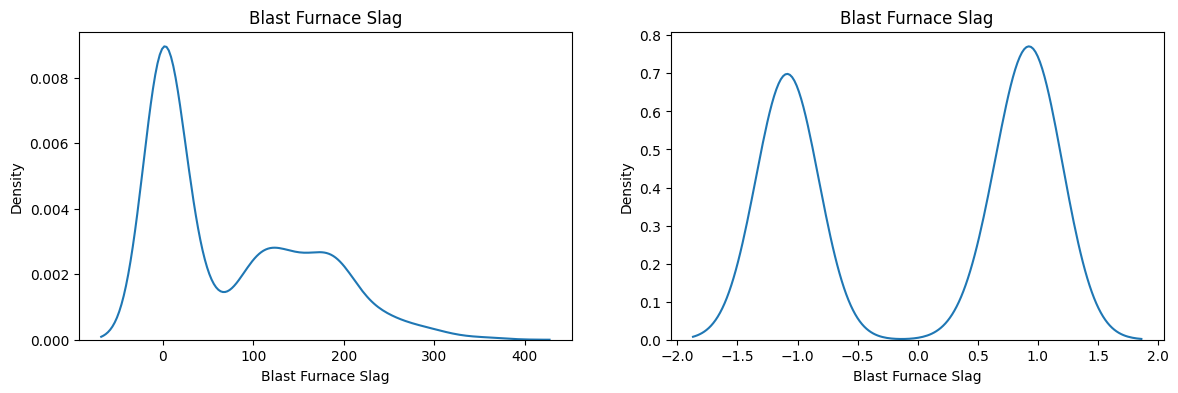

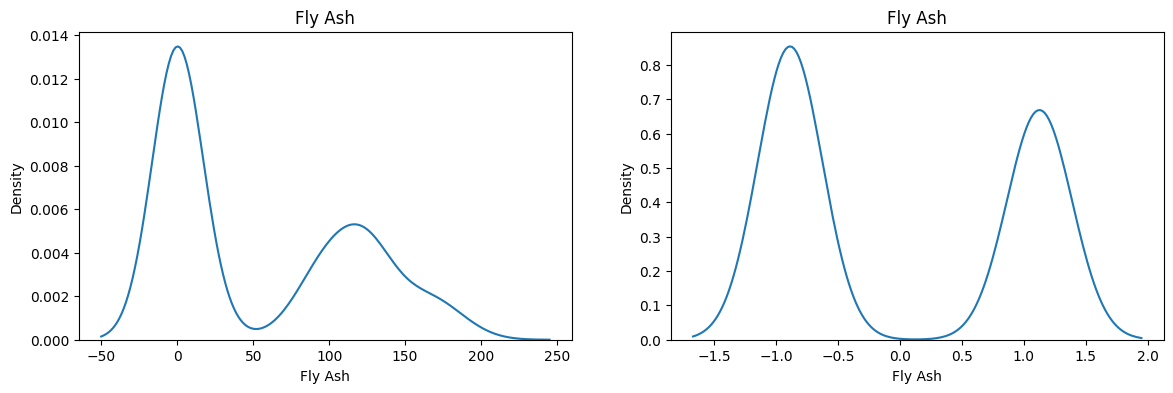

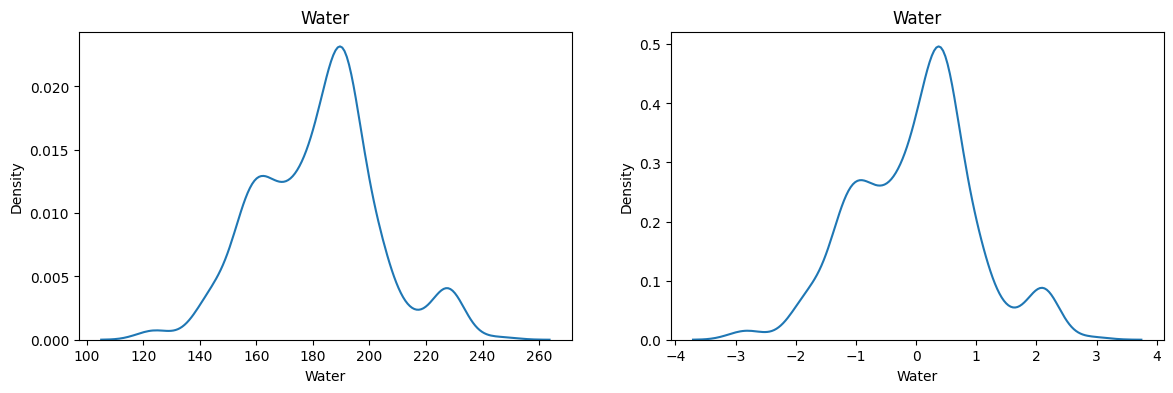

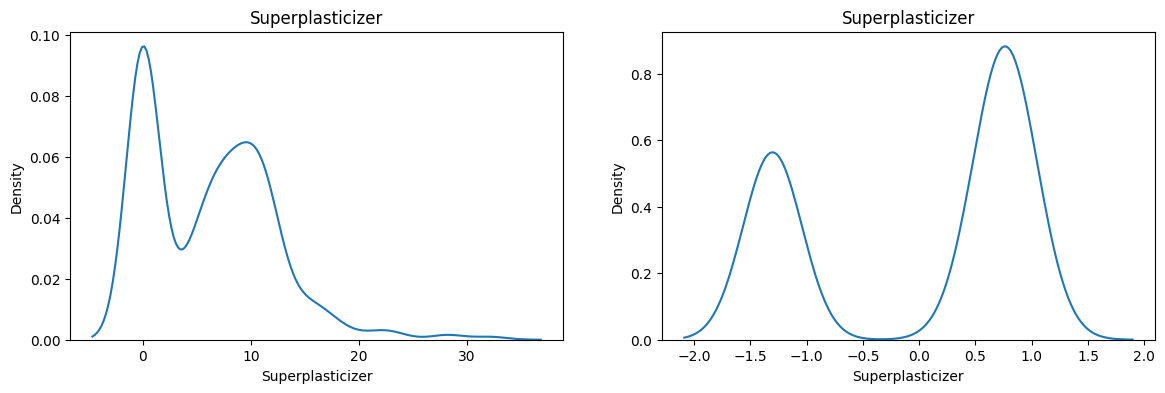

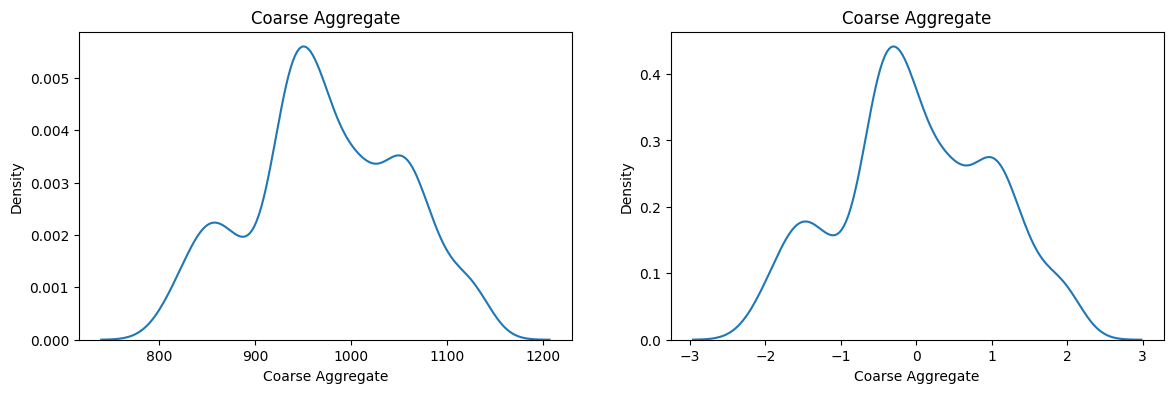

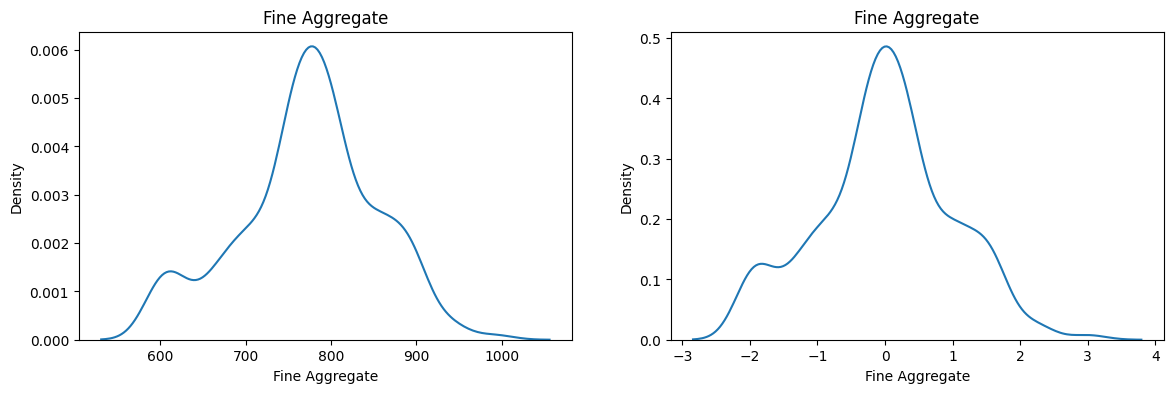

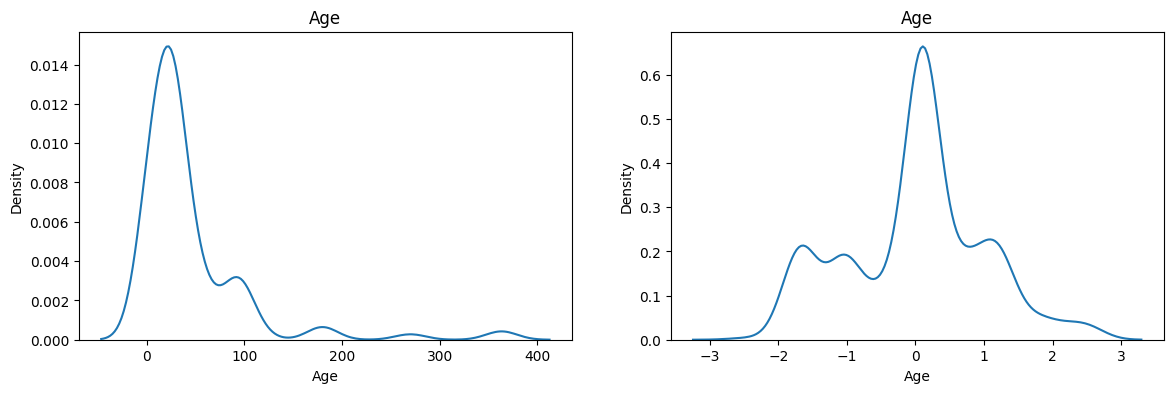

In [26]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

# Apply Yeo-Johnson transform


In [29]:
pt2=PowerTransformer()
X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

# pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt2.lambdas_})

0.8161906513339307
